## Case Study 2 Part B

In [7]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

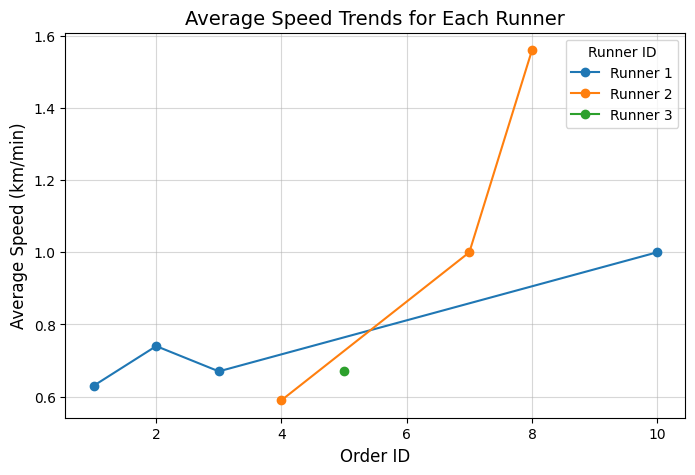

In [2]:
df = pd.read_csv('csv-files/runner_data.csv')
'''
print(df.head()) #inspects first few rows of imported data
print()
print(df.info()) #inspects column datatype
'''

plt.figure(figsize=(8, 5))

#looping through each unique runner_id for ploting a line graph
for runner_id in df['runner_id'].unique():
	#extract rows where runner_id is the current runner_id for plotting
	runner_data = df[df['runner_id'] == runner_id]
	#plot(x-axis, y-axis, marker, label)
	plt.plot(runner_data['order_id'], runner_data['avg_speed'], marker='o', label=f'Runner {runner_id}')

plt.title('Average Speed Trends for Each Runner', fontsize=14)
plt.xlabel('Order ID', fontsize=12)
plt.ylabel('Average Speed (km/min)', fontsize=12)
plt.legend(title='Runner ID')
plt.grid(alpha=0.5)
plt.show()

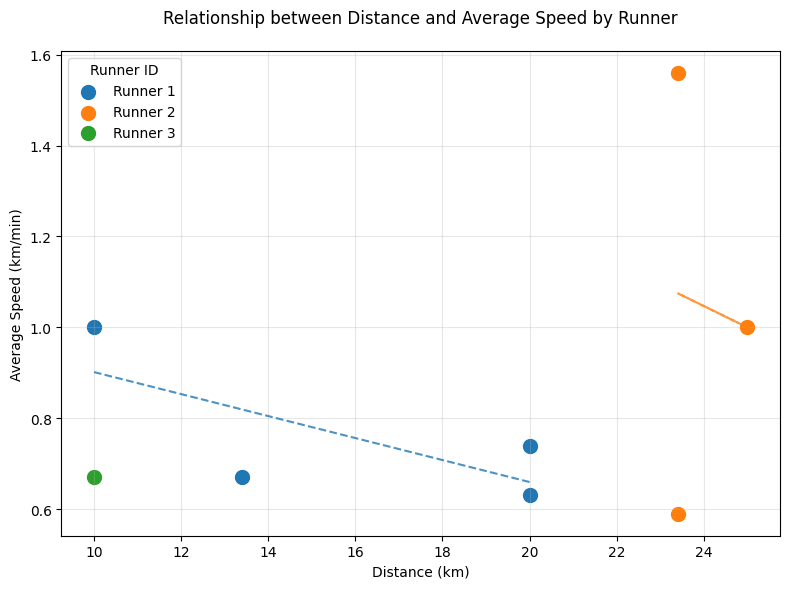

In [3]:
df = pd.read_csv('csv-files/runner_data.csv')

plt.figure(figsize=(8, 6))

# Create scatter plot with different colors for each runner
for runner in df['runner_id'].unique():
	runner_data = df[df['runner_id'] == runner]
	# plt.scatter(x-axis, y-axis, label=, s=point size)
	plt.scatter(runner_data['distance'], runner_data['avg_speed'], label=f'Runner {runner}',s=100)
	# calculate coefficients (and ignore RankWarnings)
	warnings.filterwarnings('ignore')
	coefficient = np.polyfit(runner_data['distance'], runner_data['avg_speed'], 1)
	# create polynomial function
	func = np.poly1d(coefficient)
	# plot trend line
	# plt.plot(x, f(x), linestyle=dotted_line, opacity=80%)
	plt.plot(runner_data['distance'], func(runner_data['distance']), linestyle='--', alpha=0.8)

# Customize the plot
plt.title('Relationship between Distance and Average Speed by Runner', pad=20)
plt.xlabel('Distance (km)')
plt.ylabel('Average Speed (km/min)')
plt.legend(title='Runner ID')
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

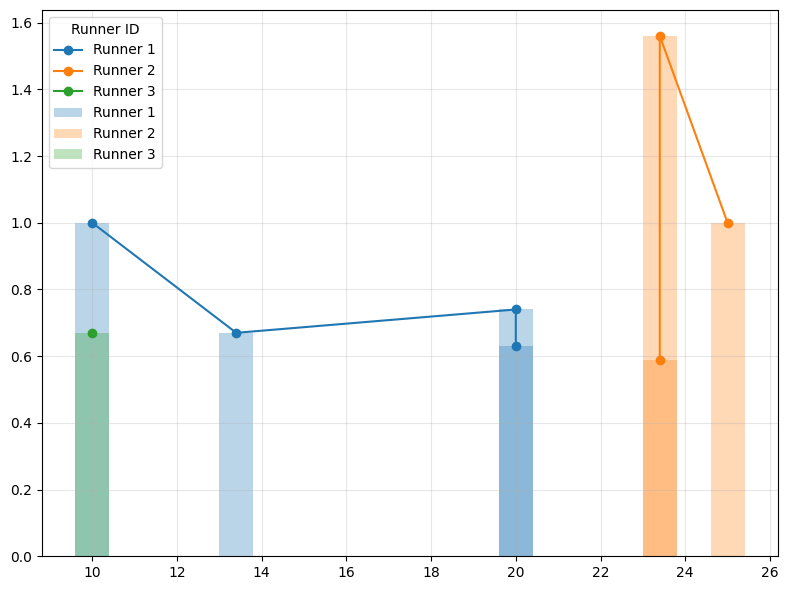

In [4]:
df = pd.read_csv('csv-files/runner_data.csv')
plt.figure(figsize=(8,6))

for runner_id in df['runner_id'].unique():
	runner_data = df[df['runner_id'] == runner_id]
	runner_data = runner_data.sort_values('distance')
	plt.bar(runner_data['distance'], runner_data['avg_speed'],  alpha=0.3, label=f'Runner {runner_id}')
	plt.plot(runner_data['distance'], runner_data['avg_speed'], marker='o', label=f'Runner {runner_id}')


plt.legend(title='Runner ID')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

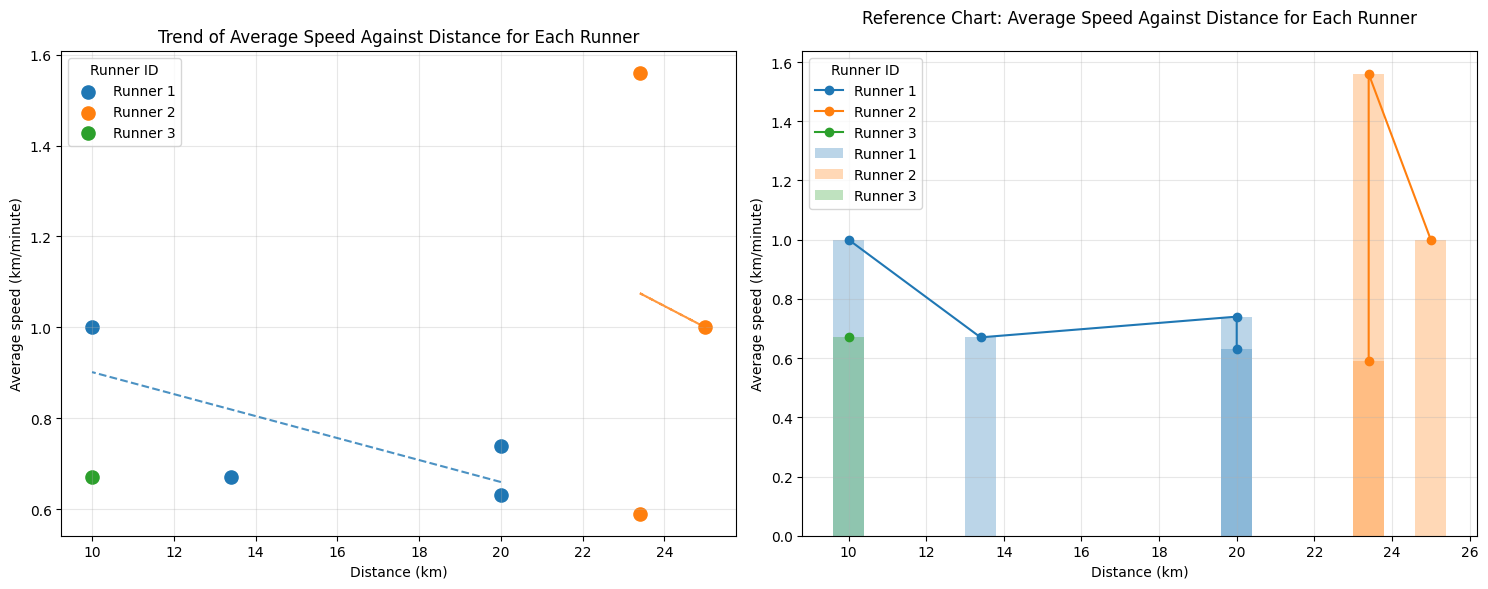

In [5]:
df = pd.read_csv('csv-files/runner_data.csv')

'''
- fig is the entire figure, and (scatter, line_bar) are the individual plotting areas
- plt.subplots(row, column, figsize=(width by height))
- in this case, row=1, column=2 means the graphs will appear side by side (on the same 1 row, and 2 columns, one for each graph)
'''
fig, (scatter, line_bar) = plt.subplots(1, 2, figsize=(15, 6))

# scatter plot
for runner_id in df['runner_id'].unique():
	runner_data = df[df['runner_id'] == runner_id]
	
	scatter.scatter(runner_data['distance'], runner_data['avg_speed'], label=f'Runner {runner_id}', s=90)
	warnings.filterwarnings('ignore')
	coefficients = np.polyfit(runner_data['distance'], runner_data['avg_speed'], 1)
	func = np.poly1d(coefficients)
	scatter.plot(runner_data['distance'], func(runner_data['distance']), linestyle='--', alpha=0.8)

# scatter plot customisation
scatter.set_title("Trend of Average Speed Against Distance for Each Runner")
scatter.set_xlabel('Distance (km)')
scatter.set_ylabel('Average speed (km/minute)')
scatter.legend(title='Runner ID')
scatter.grid(True, alpha=0.3)

# bar and line plot
for runner_id in df['runner_id'].unique():
	runner_data = df[df['runner_id'] == runner_id]
	runner_data = runner_data.sort_values('distance')
	line_bar.bar(runner_data['distance'], runner_data['avg_speed'],  alpha=0.3, label=f'Runner {runner_id}')
	line_bar.plot(runner_data['distance'], runner_data['avg_speed'], marker='o', label=f'Runner {runner_id}')

# bar and line plot customisation
plt.title("Reference Chart: Average Speed Against Distance for Each Runner", pad=20)
plt.xlabel('Distance (km)')
plt.ylabel('Average speed (km/minute)')
plt.legend(title='Runner ID')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Range: 2
Standard deviation: 0.816496580927726
Difference in percentage: 59.18%


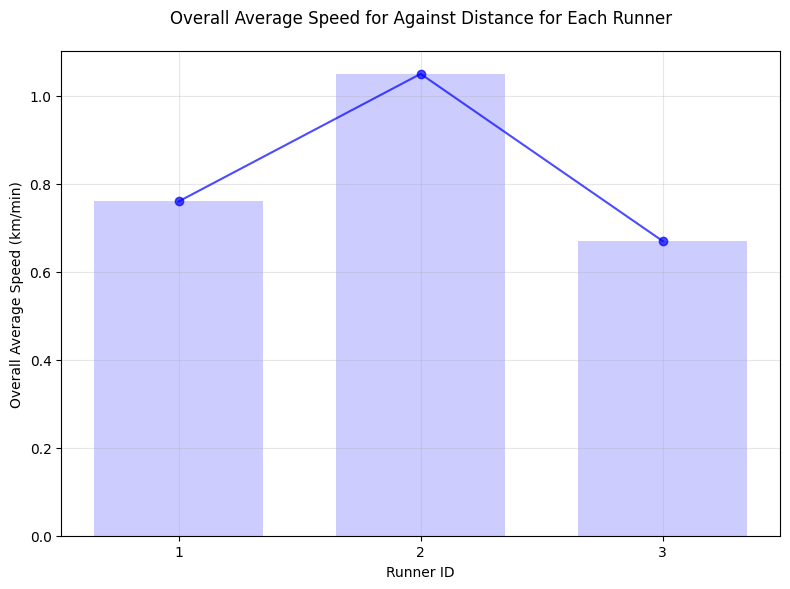

In [6]:
df = pd.read_csv('csv-files/overall_avg_speed.csv')
plt.figure(figsize=(8,6))

avg_speed = np.array(df['runner_id'])
std_dev = np.std(avg_speed)
data_range = max(avg_speed) - min(avg_speed)
print(f'Range: {data_range}')
print(f'Standard deviation: {std_dev}')
print(f'Difference in percentage: {((data_range - std_dev) / data_range * 100):.2f}%')

labels = np.array(df['runner_id'])
plt.plot(df['runner_id'], df['overall_speed'], marker='o', alpha=0.7, color='blue')
plt.bar(df['runner_id'], df['overall_speed'], alpha=0.2, color='blue', width=0.7)
plt.title("Overall Average Speed for Against Distance for Each Runner", pad=20)
plt.xlabel('Runner ID')
plt.ylabel('Overall Average Speed (km/min)')
plt.xticks(df['runner_id'], labels)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()